# 1. Baca Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 2. Data Preprocessing

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
outliers_count = {}

for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

outliers_count


{'Pregnancies': 4,
 'Glucose': 5,
 'BloodPressure': 45,
 'SkinThickness': 1,
 'Insulin': 34,
 'BMI': 19,
 'DiabetesPedigreeFunction': 29,
 'Age': 9,
 'Outcome': 0}

In [ ]:
#FITUR-FITUR numerik

list_numerik_features = ['Pregnancies', 'Glucose', 'BloodPressure',
                         'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

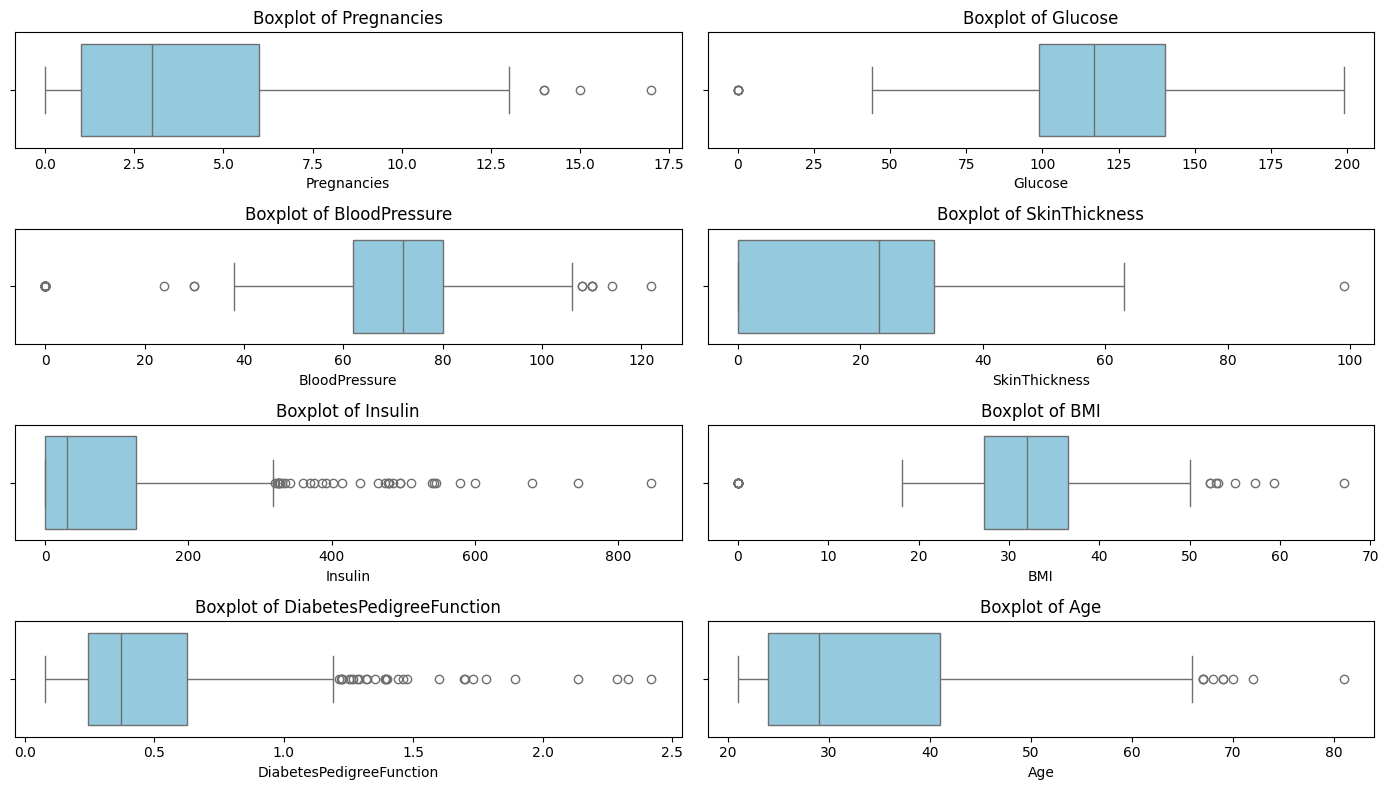

In [ ]:
# Membuat boxplot untuk melihat outlier setiap fitur numerik
plt.figure(figsize=(14, 8))
for i, feature in enumerate(list_numerik_features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
# handling outliers
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Menggunakan fungsi handle_outliers_iqr untuk setiap kolom yang memiliki outlier
list_numerik_features
for column in list_numerik_features:
    handle_outliers_iqr(df, column)

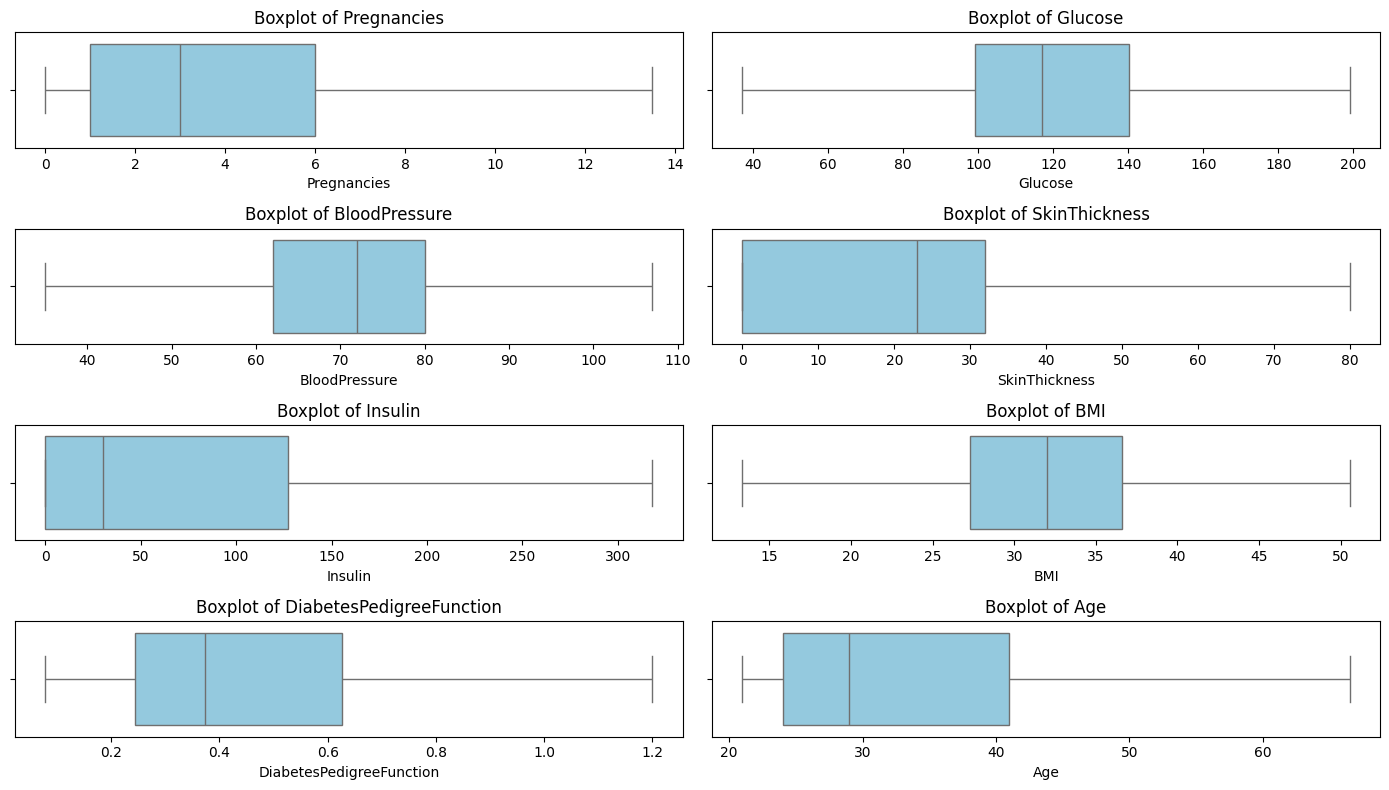

In [ ]:
# Membuat boxplot untuk melihat outlier setiap fitur numerik
plt.figure(figsize=(14, 8))
for i, feature in enumerate(list_numerik_features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
# menjulmlahkan nilai pada column target
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


<Axes: ylabel='count'>

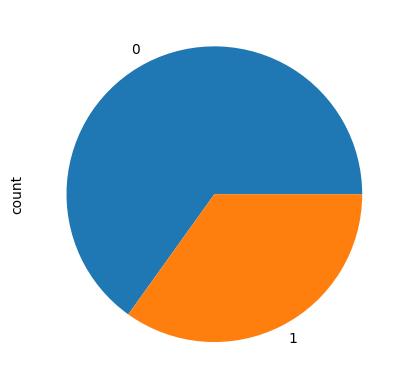

In [ ]:
# memvisualkan menggunkan pie chart
df.Outcome.value_counts().plot(kind ='pie')

# 3. EDA

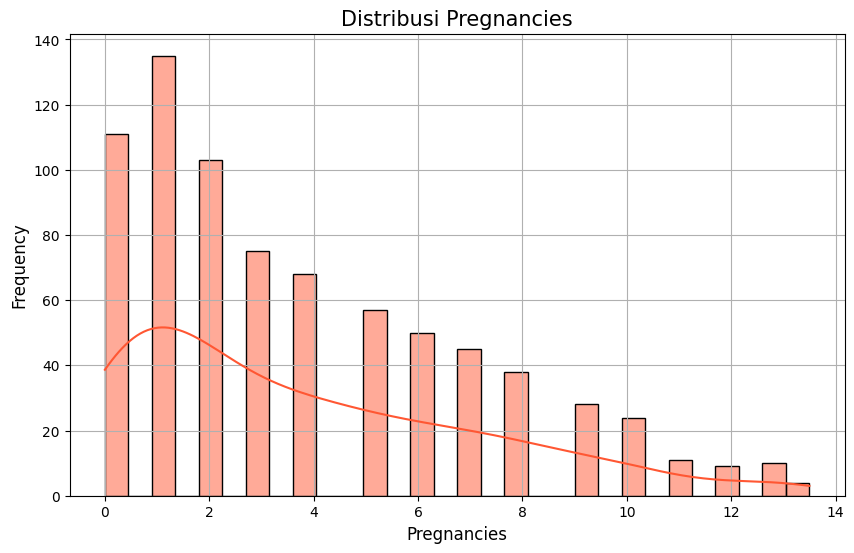

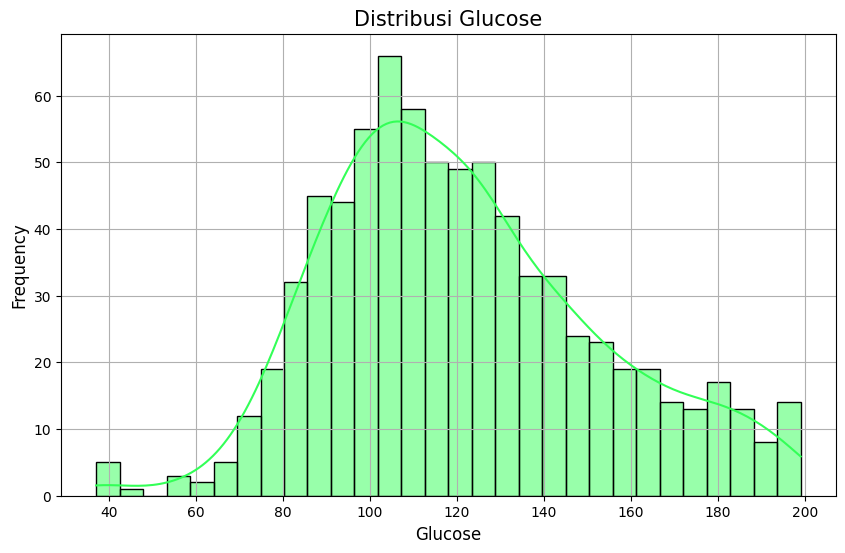

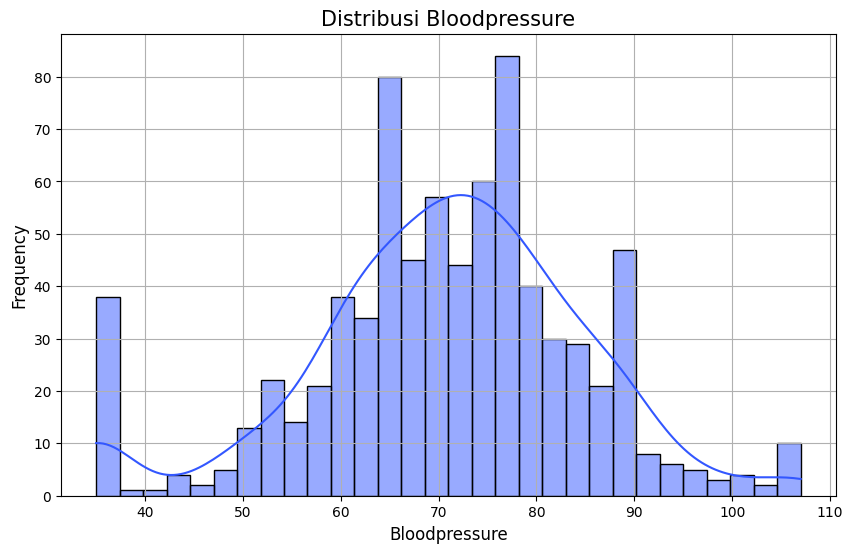

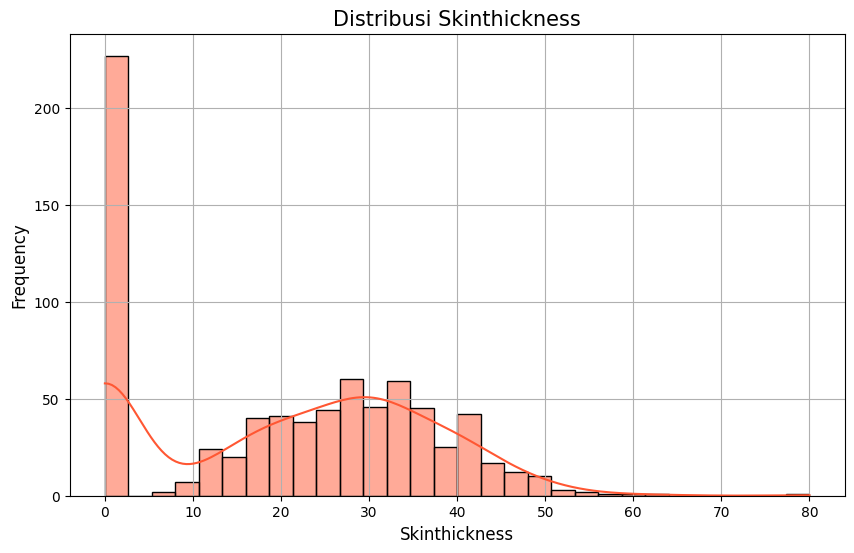

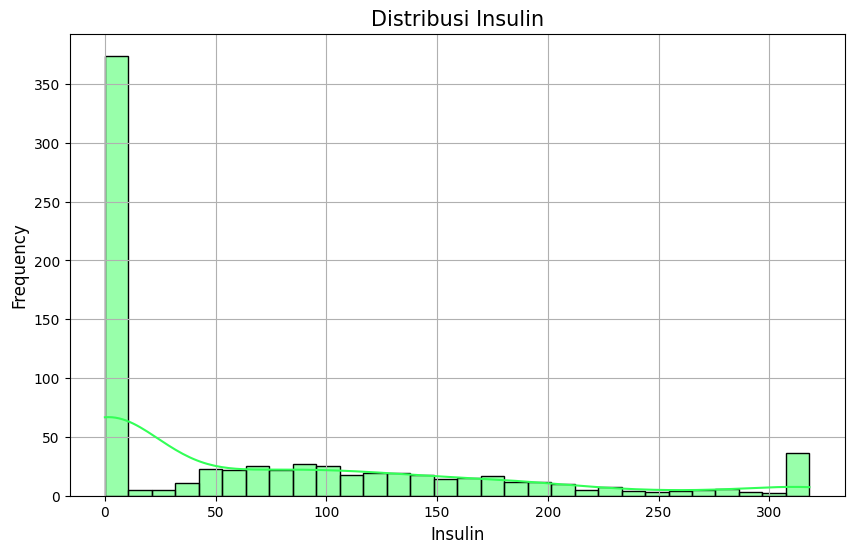

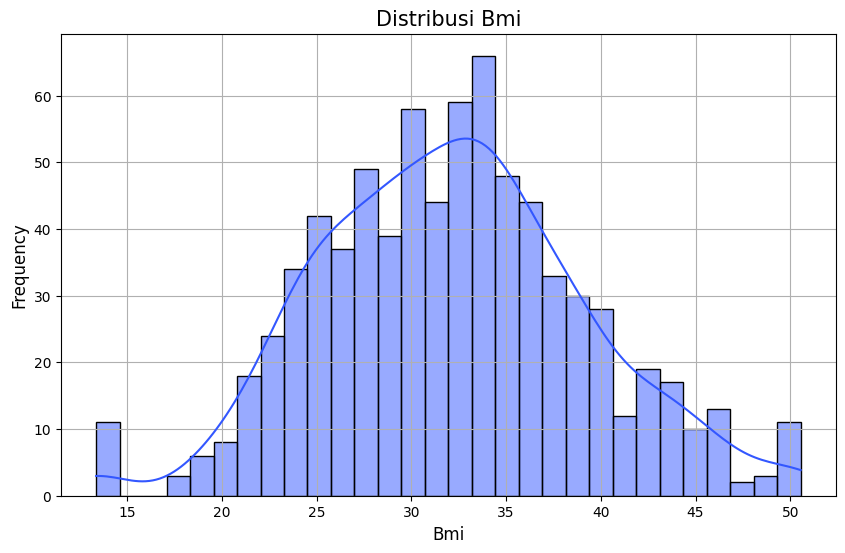

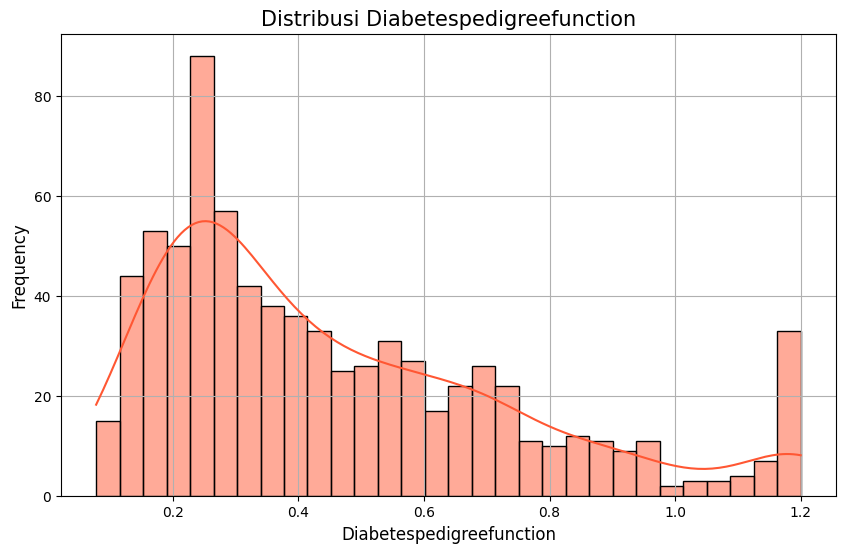

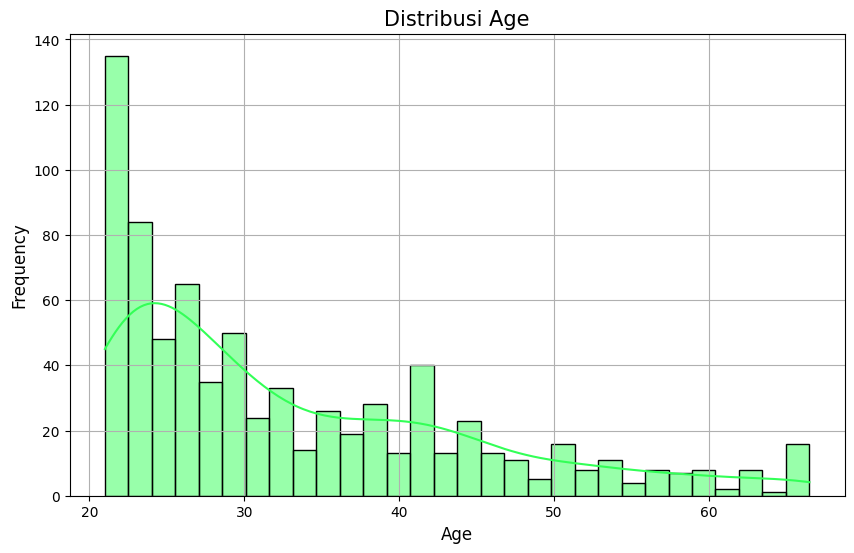

In [ ]:
for i, feature in enumerate(list_numerik_features):
    plt.figure(figsize=(10, 6))
    # Pilihan palet warna
    colors = ['#FF5733', '#33FF57', '#3357FF']
    sns.histplot(df[feature], kde=True, color=colors[i % len(colors)], bins=30)
    plt.title(f'Distribusi {feature.capitalize()}', fontsize=15)
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

# 3. Modeling

Featur Scalling

In [ ]:
# Standardisasi data (scaling)
scaler = StandardScaler()
df[list_numerik_features] = scaler.fit_transform(df[list_numerik_features])

Misahkan Data X dan Y

In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

Handling Imbalance data Menggunakan SMOTE

Membagi data training 80% dan Testing 20%

In [ ]:
# Split dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
332,-0.848970,1.888647,-2.515148,-1.295388,-0.787602,1.586224,-0.619859,0.671220
111,1.245598,1.086521,-0.612130,0.346604,2.614256,0.266137,0.294614,1.101481
64,0.946374,-0.228966,-0.330201,-1.295388,-0.787602,0.095803,-0.703948,0.757272
742,-0.848970,-0.389392,-0.894059,-0.158624,0.452840,-0.514559,-0.840594,-0.963775
101,-0.848970,0.958181,-0.753094,-1.295388,-0.787602,-0.855227,-0.980743,-0.963775
...,...,...,...,...,...,...,...,...
735,0.048702,-0.838582,-0.753094,0.725526,-0.787602,0.464860,-0.612851,-0.447461
475,-1.148194,0.508990,0.938477,0.409758,-0.787602,-0.684893,-0.798549,2.220162
46,-0.848970,0.797755,-1.035023,-1.295388,-0.787602,-0.344225,0.368192,-0.361409
767,-0.848970,-0.902753,-0.048273,0.662372,-0.787602,-0.244864,-0.504236,-0.877723


In [ ]:
y_train

,Outcome
332,1
111,1
64,1
742,0
101,0
...,...
735,0
475,0
46,0
767,0


Initial Accuracy: 0.81


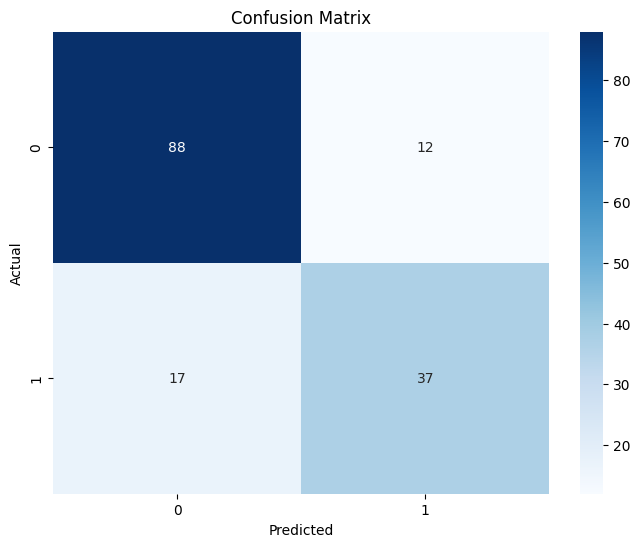

In [ ]:
# Model SVM (tanpa tuning awal)
svm_model = SVC(kernel='linear', random_state=16)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Evaluasi awal
accuracy = accuracy_score(y_test, y_pred)
print(f'Initial Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluasi awal
accuracy = accuracy_score(y_test, y_pred)
print(f'Initial Accuracy: {accuracy:.2f}')

Initial Accuracy: 0.81


# Feature Importance


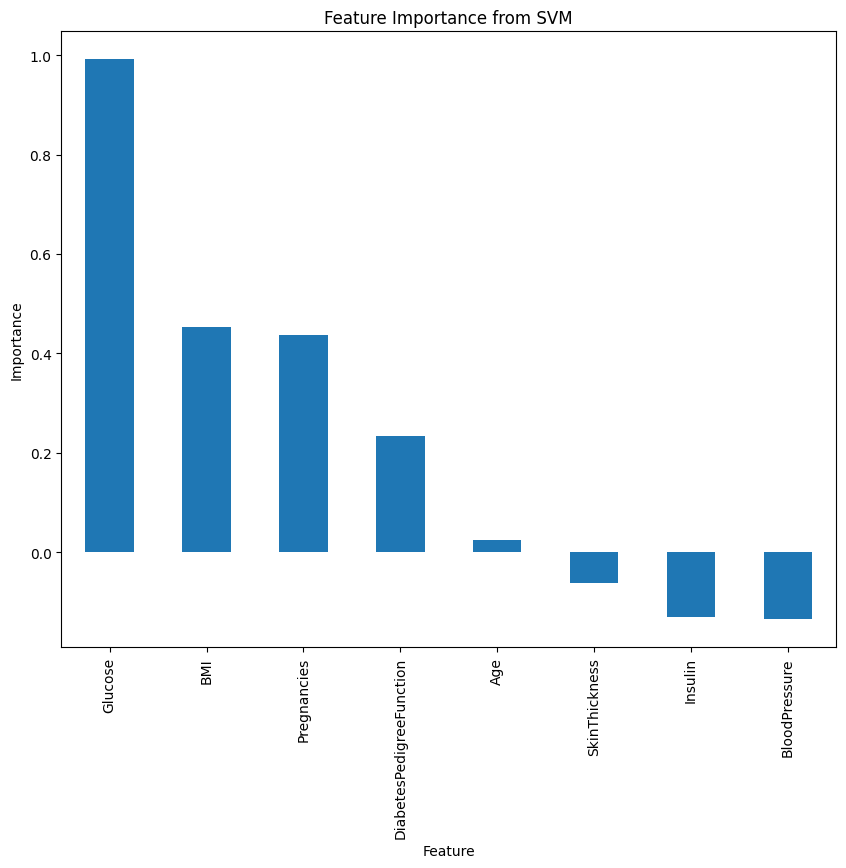

Glucose                     0.991311
BMI                         0.452750
Pregnancies                 0.437408
DiabetesPedigreeFunction    0.233408
Age                         0.024512
SkinThickness              -0.062162
Insulin                    -0.131422
BloodPressure              -0.135465
dtype: float64


In [ ]:
# Ekstrak koefisien dari model SVM
feature_importances = svm_model.coef_.flatten()  # Koefisien model SVM untuk fitur
feature_names = X_train.columns  # Nama-nama fitur

# Buat Seri untuk menyimpan koefisien dengan indeks nama fitur
importance = pd.Series(feature_importances, index=feature_names)

# Urutkan kepentingan fitur dalam urutan menurun
sorted_importance = importance.sort_values(ascending=False)

# Visualisasikan kepentingan fitur
plt.figure(figsize=(10, 8))
sorted_importance.plot(kind='bar')
plt.title('Feature Importance from SVM')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Outputkan skor kepentingan yang sudah diurutkan
print(sorted_importance)